In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

In [2]:
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("uber.csv")

In [5]:
df = data.copy()

In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [10]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df.select_dtypes(include=[np.number]).corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000589,0.000230,-0.000341,0.000270,0.000271,0.002257
fare_amount,0.000589,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.000230,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.000341,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002257,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


In [13]:
print(df.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [14]:
df.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d7f33c9290>,
 'caps': [<matplotlib.lines.Line2D at 0x2d7f33ca410>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d7f3195d10>],
 'medians': [<matplotlib.lines.Line2D at 0x2d7f33cab10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d7f33cbcd0>],
 'means': []}

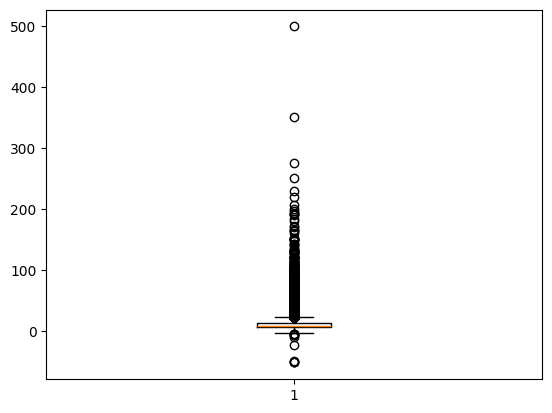

In [15]:
plt.boxplot(df['fare_amount'])

In [16]:
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

In [17]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [18]:

from sklearn.model_selection import train_test_split


In [19]:
x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

#Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred_lm = lm.predict(x_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
r2_lm = r2_score(y_test, y_pred_lm)
rmse_lm = np.sqrt(mean_squared_error(y_test, y_pred_lm))

In [22]:
print("Linear Regression Results:")
print(f"R2 Score: {r2_lm}")
print(f"RMSE: {rmse_lm}")

Linear Regression Results:
R2 Score: 0.0001529784375576826
RMSE: 8.110619486282543


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [34]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [35]:
print("\nRandom Forest Results:")
print(f"R2 Score: {r2_rf}")
print(f"RMSE: {rmse_rf}")


Random Forest Results:
R2 Score: 0.799436823003998
RMSE: 3.6325604343580813


In [36]:
print("\nModel Comparison:")
print(f"Linear Regression - R2: {r2_lm:.4f}, RMSE: {rmse_lm:.4f}")
print(f"Random Forest      - R2: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")


Model Comparison:
Linear Regression - R2: 0.0002, RMSE: 8.1106
Random Forest      - R2: 0.7994, RMSE: 3.6326


In [37]:
def predict_fare(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count):
    test_df = pd.DataFrame({
        'pickup_longitude': [pickup_longitude],
        'pickup_latitude': [pickup_latitude],
        'dropoff_longitude': [dropoff_longitude],
        'dropoff_latitude': [dropoff_latitude],
        'passenger_count': [passenger_count]
    })
    
    fare_lm = lm.predict(test_df)[0]
    fare_rf = rf.predict(test_df)[0]
    
    print("\nPredicted Fare (Linear Regression):", round(fare_lm, 2))
    print("Predicted Fare (Random Forest):", round(fare_rf, 2))

In [38]:
predict_fare(-73.95, 40.78, -73.98, 40.76, 1)


Predicted Fare (Linear Regression): 10.89
Predicted Fare (Random Forest): 10.03
